In [7]:
import pandas as pd
#讀取資料
df = pd.read_csv("C:/Users/howger/Desktop/clothing factor analysis/garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

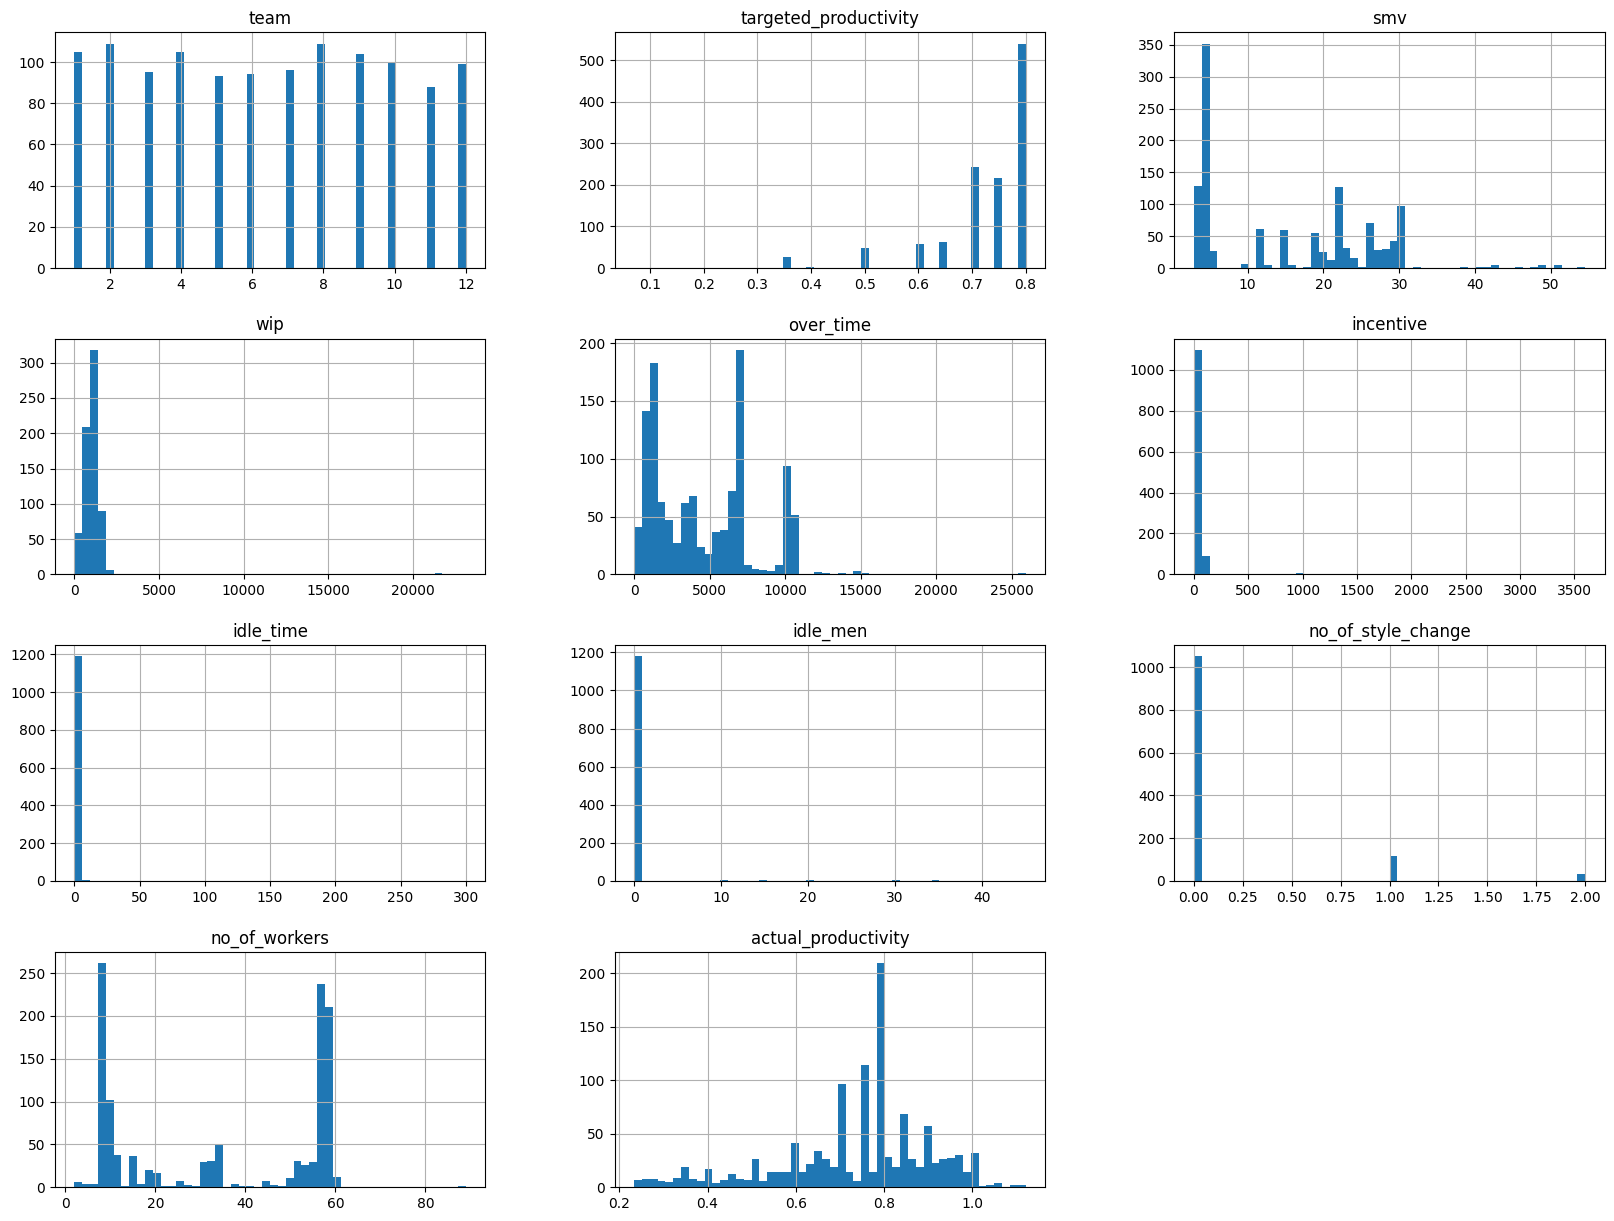

In [10]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))
plt.show()

In [11]:
df["no_of_style_change"].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

In [26]:
df["team"].value_counts()

team
11     88
5      93
6      94
3      95
7      96
12     99
10    100
9     104
1     105
4     105
8     109
2     109
Name: count, dtype: int64

In [12]:
import numpy as np
#建立測試組比率函數
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [23]:
#先利用簡單抽樣抽取20%，建立測試組
train_set , test_set = split_train_test(df,0.2)
print("訓練組:",len(train_set), "測試組:",len(test_set))

訓練組: 958 測試組: 239


In [27]:
#再利用分層抽樣，依照12個teams去分類並建立測試組
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits= 1 ,test_size = 0.2,random_state=42)
for train_index , test_index in split.split(df,df["team"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [28]:
#分層抽樣的比率
strat_test_set["team"].value_counts()/len(strat_test_set)

team
2     0.091667
8     0.091667
9     0.087500
4     0.087500
1     0.087500
10    0.083333
12    0.083333
3     0.079167
6     0.079167
7     0.079167
5     0.079167
11    0.070833
Name: count, dtype: float64

In [29]:
#備份
df = strat_train_set.copy()

In [ ]:
df.plot(kind="scatter",x = "team")